In [ ]:
from arc.species import ARCSpecies
from arc.reaction import ARCReaction
from arc.job.adapters.ts.heuristics import react
from IPython.display import display, Image
from arc.species.vectors import calculate_dihedral_angle, calculate_angle
from arc.rmgdb import make_rmg_database_object, load_families_only
from arc.plotter import draw_structure
from rmgpy.species import Species

from typing import List, Tuple, Union

/home/calvin/Code/RMG-Py/rmgpy/rmg/reactors.py:52: RuntimeWarning: Unable to import Julia dependencies, original error: No module named 'julia'
  warnings.warn("Unable to import Julia dependencies, original error: " + str(e), RuntimeWarning)
/home/calvin/mambaforge/envs/arc_env/lib/python3.7/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
rmgdb = make_rmg_database_object()
load_families_only(rmgdb)

# Example

In [3]:
smiles_r1 = 'O[O]'
xyz_r1 = """
O      -0.15554002    0.45236503    0.00000000
O       0.99423083   -0.18785602    0.00000000
H      -0.83869082   -0.26450900    0.00000000
"""

smiles_r2h = 'CCC'
xyz_r2h = """C      -1.26511392    0.18518050   -0.19976825
C       0.02461113   -0.61201635   -0.29700643
C       0.09902018   -1.69054887    0.77051392
H      -1.34710559    0.68170095    0.77242199
H      -2.12941774   -0.47587010   -0.31761654
H      -1.31335400    0.95021638   -0.98130653
H       0.88022594    0.06430231   -0.19248282
H       0.09389171   -1.07422931   -1.28794952
H      -0.73049348   -2.39807515    0.67191015
H       1.03755706   -2.24948851    0.69879172
H       0.04615234   -1.24181601    1.76737952"""

smiles_r1h = 'OO'
xyz_r1h = """O       0.58119119   -0.43123226    0.21855857
O      -0.57865095    0.44541161    0.19566260
H       1.19886844    0.18357274   -0.22099707
H      -1.20140869   -0.19775210   -0.19322406"""

smiles_r2 = 'C[CH]C'
xyz_r2 = """C       1.29196387    0.15815210    0.32047503
C      -0.03887789   -0.17543467    0.89494533
C      -1.26222918    0.47039644    0.34836510
H       1.40933232    1.23955428    0.20511486
H       2.08593721   -0.19903577    0.98301313
H       1.41699441   -0.31973461   -0.65525752
H      -0.13933823   -1.05339936    1.52398873
H      -1.51964710    0.03926484   -0.62319221
H      -2.10441807    0.31322346    1.02876738
H      -1.11812298    1.54852996    0.23271515"""

ts_xyz = """O       1.55836072   -1.23587783   -0.35951973
O       1.00967510   -0.90177596    0.94492751
H       2.46259077   -0.90915666   -0.19117197
C      -0.99257052    0.31741769   -1.40205452
C      -0.99257052    0.31741769    0.11727714
C      -0.99257052    1.72948280    0.67802778
H      -0.10532705    0.82463748   -1.79440154
H      -1.87727783    0.83831032   -1.78134455
H      -1.00563949   -0.70449332   -1.79440151
H       0.06632714   -0.32735900    0.55498420
H      -1.87498533   -0.21989618    0.48203303
H      -1.87981378    2.28133294    0.35142437
H      -0.97950190    1.71696574    1.77259693
H      -0.10786300    2.27424405    0.33389830"""

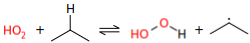

In [4]:
r1 = ARCSpecies(label=smiles_r1, smiles=smiles_r1, xyz=xyz_r1)
r2h = ARCSpecies(label=smiles_r2h, smiles=smiles_r2h, xyz=xyz_r2h)
r1h = ARCSpecies(label=smiles_r1h, smiles=smiles_r1h, xyz=xyz_r1h)
r2 = ARCSpecies(label=smiles_r2, smiles=smiles_r2, xyz=xyz_r2)

rxn = ARCReaction(r_species=[r1, r2h], p_species=[r1h, r2])
rxn.ts_species = ARCSpecies(label='TS', is_ts=True, xyz=ts_xyz)
template_rxns = react(reactants=[spc.mol for spc in rxn.r_species],
                      products=[spc.mol for spc in rxn.p_species],
                      family=rmgdb.kinetics.families['H_Abstraction'],
                      arc_reaction=rxn,
                     )
template_rxn = template_rxns[0]
display(template_rxn)

In [ ]:
template_rxn.reactants[0].molecule[0].atoms[1].label
# Label *3 is the Acceptor atom


'*3'

In [18]:
template_rxn.reactants[1].molecule[0].atoms[1].label
# Label *1 is the Donor atom

'*1'

In [26]:
template_rxn.reactants[1].molecule[0].atoms[6].label
# Label *2 is the Hydrogen atom

'*2'

In [34]:
path_df = "/home/calvin/Dropbox/PersonalFolders/Calvin/ATLAS_Converged"

In [ ]:
import os

read_yaml(os.path.join(path_df, 'rmg_rxn_212','input.yml'))['species']

[{'label': 'rmg_rxn_212_r1_CC=NO', 'smiles': 'CC=NO'},
 {'label': 'rmg_rxn_212_r2_Csbr-CH-sbrCOCC', 'smiles': 'C[CH]COCC'},
 {'label': 'rmg_rxn_212_p1_CC=Nsbr-O-sbr', 'smiles': 'CC=N[O]'},
 {'label': 'rmg_rxn_212_p2_CCCOCC', 'smiles': 'CCCOCC'}]

In [27]:
def read_yaml(yaml_path: str) -> dict:
    import yaml
    with open(yaml_path, 'r') as f:
        return yaml.load(f, Loader=yaml.FullLoader)

In [ ]:
def extract_ts(ts):
    

In [ ]:
def active_site_finder(r0, r1, p0, p1):
    
    
    r0_species = ARCSpecies(label=str(r0), smiles=r0)
    r1_species = ARCSpecies(label=str(r1), smiles=r1)
    p0_species = ARCSpecies(label=str(p0), smiles=p0)
    p1_species = ARCSpecies(label=str(p1), smiles=p1)
    

    # try:
    #     rxn = ARCReaction(r_species=[r0_species, r1_species], p_species=[p0_species, p1_species])
    #     rxn.determine_family(rmgdb=rmgdb)
    
    #     for arc_spc in rxn.r_species + rxn.p_species:
    #         rmg_spc = Species(molecule=[arc_spc.mol.copy(deep=True)])
    #         rmg_spc.generate_resonance_structures()
    #         arc_spc.thermo = rmgdb.thermo.get_thermo_data(rmg_spc)
    
    
            
            